In [39]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/weatherstats_edmonton_daily.csv', low_memory = False)
list(df.columns)

['date',
 'max_temperature',
 'avg_temperature',
 'avg_hourly_temperature',
 'min_temperature',
 'max_humidex',
 'min_windchill',
 'max_relative_humidity',
 'avg_relative_humidity',
 'min_relative_humidity',
 'max_dew_point',
 'avg_dew_point',
 'min_dew_point',
 'max_wind_speed',
 'avg_wind_speed',
 'min_wind_speed',
 'max_wind_gust',
 'wind_gust_dir_10s',
 'max_pressure_sea',
 'avg_pressure_sea',
 'min_pressure_sea',
 'max_pressure_station',
 'avg_pressure_station',
 'min_pressure_station',
 'max_visibility',
 'avg_visibility',
 'min_visibility',
 'max_health_index',
 'avg_health_index',
 'min_health_index',
 'heatdegdays',
 'cooldegdays',
 'growdegdays_5',
 'growdegdays_10',
 'precipitation',
 'rain',
 'snow',
 'snow_on_ground',
 'sunrise',
 'sunset',
 'sunlight',
 'sunrise_f',
 'sunset_f',
 'min_uv_forecast',
 'max_uv_forecast',
 'min_high_temperature_forecast',
 'max_high_temperature_forecast',
 'min_low_temperature_forecast',
 'max_low_temperature_forecast',
 'solar_radiation',
 '

In [40]:
for label in df.columns:
    uniqueValues = len(df[label].value_counts())
    print(label + ": " + str(uniqueValues))
    
    # remove columns that have no values
    if uniqueValues == 0:
        del df[label]
        
    # keep only columns that are not min or max
    elif label.find("min") != -1 or label.find("max") != -1:
        if label != "max_wind_gust" and label != "min_windchill":
            del df[label]
            
# do not need sunrise or sunset times
del df['sunrise_f']
del df['sunset_f']
del df['sunrise']
del df['sunset']

# missing two years of data for cloud cover; only from <= 2015
del df['avg_cloud_cover_4']
del df['avg_cloud_cover_10']

# missing average visibility; only from <= 2015
del df['avg_visibility']

# missing 3 years of data for snow on the ground; only from >= 2015
del df['snow_on_ground']

# remove pressure since we are always around the same pressure because of location
del df['avg_pressure_sea']
del df['avg_pressure_station']

# avg_temperature and avg_hourly_temperature are similar
# avg_temperature = max_temp + min_temp / 2
# avg_hourly_temperature is the average of temperature of all hours during the day
# remove avg_temperature
del df['avg_temperature']

        
df.to_csv('data/weather_cleaned.csv', index=False)

date: 1782
max_temperature: 480
avg_temperature: 845
avg_hourly_temperature: 1417
min_temperature: 424
max_humidex: 18
min_windchill: 42
max_relative_humidity: 60
avg_relative_humidity: 565
min_relative_humidity: 87
max_dew_point: 404
avg_dew_point: 402
min_dew_point: 419
max_wind_speed: 47
avg_wind_speed: 483
min_wind_speed: 20
max_wind_gust: 51
wind_gust_dir_10s: 36
max_pressure_sea: 88
avg_pressure_sea: 385
min_pressure_sea: 82
max_pressure_station: 336
avg_pressure_station: 351
min_pressure_station: 356
max_visibility: 9
avg_visibility: 296
min_visibility: 34
max_health_index: 93
avg_health_index: 54
min_health_index: 38
heatdegdays: 371
cooldegdays: 56
growdegdays_5: 186
growdegdays_10: 134
precipitation: 115
rain: 0
snow: 0
snow_on_ground: 24
sunrise: 228
sunset: 355
sunlight: 552
sunrise_f: 228
sunset_f: 355
min_uv_forecast: 6
max_uv_forecast: 6
min_high_temperature_forecast: 58
max_high_temperature_forecast: 59
min_low_temperature_forecast: 54
max_low_temperature_forecast: 52
s

In [13]:
df


date  avg_hourly_temperature  min_windchill  \
0     2017-11-16                  -11.36          -22.0   
1     2017-11-15                   -9.79          -19.0   
2     2017-11-14                   -9.16          -18.0   
3     2017-11-13                   -7.86          -16.0   
4     2017-11-12                   -7.03          -15.0   
5     2017-11-11                   -5.54          -15.0   
6     2017-11-10                   -7.69          -14.0   
7     2017-11-09                  -10.16          -21.0   
8     2017-11-08                  -10.86          -18.0   
9     2017-11-07                   -7.85          -14.0   
10    2017-11-06                   -8.93          -18.0   
11    2017-11-05                  -10.03          -20.0   
12    2017-11-04                  -13.71          -20.0   
13    2017-11-03                  -12.77          -21.0   
14    2017-11-02                  -10.43          -19.0   
15    2017-11-01                   -2.98          -14.0   
16    2017-10-31                    1.15           -6.0   
17    2017-10-30                    0.63           -8.0   
18    2017-10-29                    2.60            NaN   
19    2017-10-28                   11.43            NaN   
20    2017-10-27                    5.67           -2.0   
21    2017-10-26                    1.10           -8.0   
22    2017-10-25                    3.34           -5.0   
23    2017-10-24                   10.58            NaN   
24    2017-10-23                    7.75            NaN   
25    2017-10-22                    5.53            NaN   
26    2017-10-21                    4.29           -3.0   
27    2017-10-20                    6.22            NaN   
28    2017-10-19                    8.22            NaN   
29    2017-10-18                    4.93            NaN   
...          ...                     ...            ...   
1752  2013-01-29                  -25.69          -43.0   
1753  2013-01-28                  -14.89          -37.0   
1754  2013-01-27                  -10.00          -19.0   
1755  2013-01-26                   -7.64          -16.0   
1756  2013-01-25                   -3.59          -12.0   
1757  2013-01-24                  -11.45          -23.0   
1758  2013-01-23                  -13.74          -24.0   
1759  2013-01-22                  -13.38          -21.0   
1760  2013-01-21                  -14.20          -24.0   
1761  2013-01-20                  -21.33          -34.0   
1762  2013-01-19                  -12.34          -32.0   
1763  2013-01-18                    0.42          -21.0   
1764  2013-01-17                   -0.59          -10.0   
1765  2013-01-16                    0.05          -10.0   
1766  2013-01-15                    5.62            NaN   
1767  2013-01-14                   -3.19          -18.0   
1768  2013-01-13                  -13.48          -21.0   
1769  2013-01-12                  -12.25          -23.0   
1770  2013-01-11                  -17.55          -27.0   
1771  2013-01-10                  -15.60          -28.0   
1772  2013-01-09                   -4.60          -16.0   
1773  2013-01-08                   -2.11          -10.0   
1774  2013-01-07                   -5.54          -13.0   
1775  2013-01-06                   -2.89          -10.0   
1776  2013-01-05                   -4.53          -12.0   
1777  2013-01-04                   -7.51          -14.0   
1778  2013-01-03                   -4.05          -11.0   
1779  2013-01-02                   -5.05          -13.0   
1780  2013-01-01                   -0.84          -10.0   
1781  2012-12-31                   -5.38          -16.0   

      avg_relative_humidity  avg_dew_point  avg_wind_speed  max_wind_gust  \
0                      83.8          -13.6            9.38            NaN   
1                      86.9          -11.5           17.67           41.0   
2                      88.9          -10.7           10.58           28.0   
3                      95.3           -8.5   

In [41]:
# next we turn our attributes into categorical data for binarization
# below freezing
#df.loc[df['avg_hourly_temperature'] == 0, 'avg_hourly_temperature'] nothing equals 0
df['avg_hourly_temperature'] = \
    pd.cut(df['avg_hourly_temperature'], bins = [-np.inf, 21, np.inf], right= False, \
       labels = [np.nan, "hot"])
df['avg_hourly_temperature'].value_counts()

/home/k/anaconda3/lib/python3.5/site-packages/pandas/tools/tile.py:223: FutureWarning: 
Setting NaNs in `categories` is deprecated and will be removed in a future version of pandas.
  fac = Categorical(ids - 1, levels, ordered=True, fastpath=True)


hot    76
Name: avg_hourly_temperature, dtype: int64

In [42]:
# min_windchill
# risk of frostbite
# >= -2 none
# >=-27 low
# >=-39 moderate
# >= -47 high
# >= -54 very high
# >= -81 severe

df['min_windchill'] = \
    pd.cut(df['min_windchill'],\
       bins = [-np.inf, -54, -47, -39, -27, -2, np.inf], right=False,\
       labels = ['extreme','severe','very high','high','moderate','low'])
df['min_windchill'].value_counts()

moderate     685
high          88
low           17
very high      3
severe         0
extreme        0
Name: min_windchill, dtype: int64

In [43]:
# relative humidity around 40-50 is comfortable
#df['avg_relative_humidity'] = pd.cut(df['avg_relative_humidity'], \
#       bins = [-np.inf, 40, 50, np.inf], right = False, \
#      labels = ["no_low","yes","no_high"])
#df['avg_relative_humidity'].value_counts()
del df['avg_relative_humidity']

In [44]:
# perception of environment
df['avg_dew_point'] = pd.cut(df['avg_dew_point'], \
      bins = [-np.inf, 10, 13,16,18,21,24,26,np.inf], right=False,\
      labels = [np.nan, "very humid", "comfortable", "ok", "somewhat", "quite", "extreme", "severe"])
df['avg_dew_point'].value_counts()

/home/k/anaconda3/lib/python3.5/site-packages/pandas/tools/tile.py:223: FutureWarning: 
Setting NaNs in `categories` is deprecated and will be removed in a future version of pandas.
  fac = Categorical(ids - 1, levels, ordered=True, fastpath=True)


very humid     187
comfortable     71
ok              12
somewhat         1
severe           0
extreme          0
quite            0
Name: avg_dew_point, dtype: int64

In [45]:
# wind_speed
#df['avg_wind_speed'] = \
#    pd.cut(df['avg_wind_speed'], bins = [-np.inf, 0, np.inf], \
#       labels = ["no", "yes"])
#df['avg_wind_speed'].value_counts()

# actually useless there is wind everyday
del df['avg_wind_speed']

In [46]:
# wind gust
df['max_wind_gust'] = pd.cut(df['max_wind_gust'],\
       bins = [-np.inf,0.1,29, 40, np.inf], right=False, \
      labels = [np.nan,"windy","windy_direction", "strong_winds"])
df['max_wind_gust'].value_counts()

/home/k/anaconda3/lib/python3.5/site-packages/pandas/tools/tile.py:223: FutureWarning: 
Setting NaNs in `categories` is deprecated and will be removed in a future version of pandas.
  fac = Categorical(ids - 1, levels, ordered=True, fastpath=True)


windy_direction    549
strong_winds       478
windy               61
Name: max_wind_gust, dtype: int64

In [47]:
# get the directions of wind
df['wind_gust_dir_10s'] = df['wind_gust_dir_10s'] * 10
import math

# https://stackoverflow.com/a/7490772
def degToCompass(num):
    if math.isnan(num):
        return np.nan
    val=int((num/22.5)+.5)
    arr=["N","NNE","NE","ENE","E","ESE", "SE", "SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"]
    return arr[(val % 16)]

df['wind_gust_dir_10s'] = df['wind_gust_dir_10s'].apply(lambda x: degToCompass(x))
df['wind_gust_dir_10s'].value_counts()


NW     233
WNW    118
W      104
S       99
SSE     93
NNW     89
N       88
SE      68
E       39
NNE     32
ESE     29
SSW     24
NE      19
ENE     19
WSW     18
SW      16
Name: wind_gust_dir_10s, dtype: int64

In [48]:
# avg_health_index
df['avg_health_index'] = pd.cut(df['avg_health_index'], \
       bins = [-np.inf, 4, 7,10, np.inf], right = False, \
       labels = [np.nan,'moderate','high','very_high'])
df['avg_health_index'].value_counts()

/home/k/anaconda3/lib/python3.5/site-packages/pandas/tools/tile.py:223: FutureWarning: 
Setting NaNs in `categories` is deprecated and will be removed in a future version of pandas.
  fac = Categorical(ids - 1, levels, ordered=True, fastpath=True)


moderate     93
high          7
very_high     0
Name: avg_health_index, dtype: int64

In [50]:
#df['heatdegdays'] = pd.cut(df['heatdegdays'], bins = [-np.inf, 0, np.inf], \
#       labels = ["no", "yes"])
#df['heatdegdays'].value_counts()
del df['heatdegdays']

In [51]:
#df['cooldegdays'] = pd.cut(df['cooldegdays'], bins = [-np.inf, 0, np.inf], \
#       labels = ["no", "yes"])
#df['cooldegdays'].value_counts()
del df['cooldegdays']

In [52]:
#df['growdegdays_5'] = pd.cut(df['growdegdays_5'], bins = [-np.inf, 0, np.inf], \
#       labels = ["no", "yes"])
#df['growdegdays_5'].value_counts()
del df['growdegdays_5']

In [53]:
#df['growdegdays_10'] = pd.cut(df['growdegdays_10'], bins = [-np.inf, 0, np.inf], \
#       labels = ["no", "yes"])
#df['growdegdays_10'].value_counts()
del df['growdegdays_10']

In [54]:
df['precipitation'] = pd.cut(df['precipitation'], bins = [-np.inf, 0, np.inf], \
       labels = [np.nan, "yes"])
df['precipitation'].value_counts()

/home/k/anaconda3/lib/python3.5/site-packages/pandas/tools/tile.py:223: FutureWarning: 
Setting NaNs in `categories` is deprecated and will be removed in a future version of pandas.
  fac = Categorical(ids - 1, levels, ordered=True, fastpath=True)


yes    736
Name: precipitation, dtype: int64

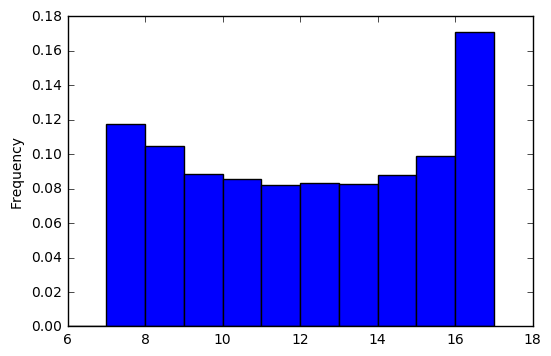

In [55]:
import matplotlib.pyplot as plt 
import numpy as np

df['sunlight'].plot.hist(bins=np.arange(6,18,1),normed=1, cumulative=False)
plt.show()

In [56]:
df['sunlight'] = pd.cut(df['sunlight'], \
        bins = [-np.inf, 8, 9, 10, 11, 12, 13, 14, 15, 16, np.inf], \
       right = False, labels = ["<8","8","9", "10", "11", "12", "13", "14", "15", "16+"])
df['sunlight'].value_counts()

16+    354
<8     202
8      180
15     170
9      152
14     151
10     147
12     143
13     142
11     141
Name: sunlight, dtype: int64

In [57]:
df

date avg_hourly_temperature min_windchill avg_dew_point  \
0     2017-11-16                    NaN      moderate           NaN   
1     2017-11-15                    NaN      moderate           NaN   
2     2017-11-14                    NaN      moderate           NaN   
3     2017-11-13                    NaN      moderate           NaN   
4     2017-11-12                    NaN      moderate           NaN   
5     2017-11-11                    NaN      moderate           NaN   
6     2017-11-10                    NaN      moderate           NaN   
7     2017-11-09                    NaN      moderate           NaN   
8     2017-11-08                    NaN      moderate           NaN   
9     2017-11-07                    NaN      moderate           NaN   
10    2017-11-06                    NaN      moderate           NaN   
11    2017-11-05                    NaN      moderate           NaN   
12    2017-11-04                    NaN      moderate           NaN   
13    2017-11-03                    NaN      moderate           NaN   
14    2017-11-02                    NaN      moderate           NaN   
15    2017-11-01                    NaN      moderate           NaN   
16    2017-10-31                    NaN      moderate           NaN   
17    2017-10-30                    NaN      moderate           NaN   
18    2017-10-29                    NaN           NaN           NaN   
19    2017-10-28                    NaN           NaN           NaN   
20    2017-10-27                    NaN           low           NaN   
21    2017-10-26                    NaN      moderate           NaN   
22    2017-10-25                    NaN      moderate           NaN   
23    2017-10-24                    NaN           NaN           NaN   
24    2017-10-23                    NaN           NaN           NaN   
25    2017-10-22                    NaN           NaN           NaN   
26    2017-10-21                    NaN      moderate           NaN   
27    2017-10-20                    NaN           NaN           NaN   
28    2017-10-19                    NaN           NaN           NaN   
29    2017-10-18                    NaN           NaN           NaN   
...          ...                    ...           ...           ...   
1752  2013-01-29                    NaN     very high           NaN   
1753  2013-01-28                    NaN          high           NaN   
1754  2013-01-27                    NaN      moderate           NaN   
1755  2013-01-26                    NaN      moderate           NaN   
1756  2013-01-25                    NaN      moderate           NaN   
1757  2013-01-24                    NaN      moderate           NaN   
1758  2013-01-23                    NaN      moderate           NaN   
1759  2013-01-22                    NaN      moderate           NaN   
1760  2013-01-21                    NaN      moderate           NaN   
1761  2013-01-20                    NaN          high           NaN   
1762  2013-01-19                    NaN          high           NaN   
1763  2013-01-18                    NaN      moderate           NaN   
1764  2013-01-17                    NaN      moderate           NaN   
1765  2013-01-16                    NaN      moderate           NaN   
1766  2013-01-15                    NaN           NaN           NaN   
1767  2013-01-14                    NaN      moderate           NaN   
1768  2013-01-13                    NaN      moderate           NaN   
1769  2013-01-12                    NaN      moderate           NaN   
1770  2013-01-11                    NaN      moderate           NaN   
1771  2013-01-10                    NaN          high           NaN   
1772  2013-01-09                    NaN      moderate           NaN   
1773  2013-01-08                    NaN      moderate           NaN   
1774  2013-01-07                    NaN      moderate           NaN   
1775  2013-01-06                    NaN      moderate           NaN   
1776  2013-01-05                    

In [58]:
df.to_csv('data/weather_categorized.csv', index=False)